## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn.datasets import load_boston
from scipy.stats import sem 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mouse_study = pd.merge(mouse_metadata,study_results,
                                how="outer")
combine_mouse_study.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:

combine_mouse_study.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
len(combine_mouse_study)




1893

In [4]:
combine_mouse_study["Timepoint"].describe()


count    1893.000000
mean       19.572108
std        14.079460
min         0.000000
25%         5.000000
50%        20.000000
75%        30.000000
max        45.000000
Name: Timepoint, dtype: float64

In [5]:
combine_mouse_study["Mouse ID"].describe()


count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [6]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_mouse_study[combine_mouse_study.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combine_mouse_study[combine_mouse_study.duplicated(["Mouse ID"])]
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_mouse_study.drop(combine_mouse_study[combine_mouse_study["Mouse ID" ]== "z969"].index, inplace=True)

In [10]:
# Checking the number of mice in the clean DataFrame.
mice_count = combine_mouse_study["Mouse ID"].count()
mice_count

mice_df = pd.DataFrame({"Mice":[mice_count]})
mice_df


,Mice
0,1883


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mice_volume_mean = combine_mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mice_volume_median = combine_mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mice_volume_var = combine_mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
mice_volume_std = combine_mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
mice_volume_sem = combine_mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]




In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
sum_mice_volume_df = pd.DataFrame(mice_volume_mean)
sum_mice_volume_df["Tumor Volume Median"] = mice_volume_median
sum_mice_volume_df["Tumor Volume Variance"] = mice_volume_var
sum_mice_volume_df["Tumor Volumes Standard deviation "] = mice_volume_std
sum_mice_volume_df["Tumor Volume Standard Error"] = mice_volume_sem

#rename the columns
sum_mice_volume_df=sum_mice_volume_df.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Mean",})
sum_mice_volume_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volumes Standard deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,53.998435,51.938261,63.012382,7.938034,0.598352
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'count of mouse')

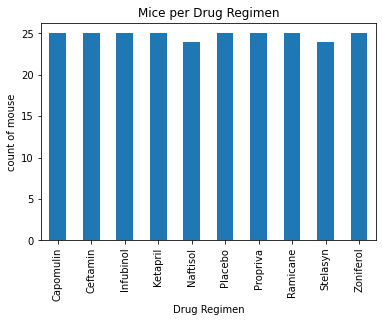

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_pd_df = combine_mouse_study.groupby("Drug Regimen").nunique()["Mouse ID"]
mice_pd = mice_pd_df.plot.bar(title="Mice per Drug Regimen")

mice_pd.set_xlabel("Drug Regimen")
mice_pd.set_ylabel("count of mouse")

In [14]:
mouse_drug_group = combine_mouse_study.groupby("Drug Regimen")
count_mouse = mouse_drug_group["Drug Regimen"].count()
count_mouse

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     176
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

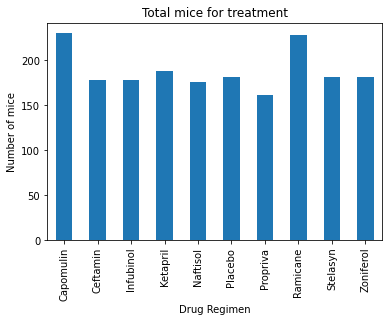

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_treatment = count_mouse.plot(kind="bar")
mouse_treatment.set_xlabel("Drug Regimen")
mouse_treatment.set_ylabel("Number of mice")
plt.title("Total mice for treatment")
plt.show()
plt.tight_layout()

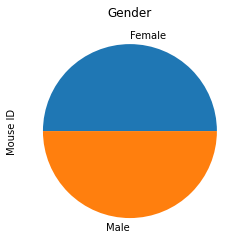

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_pd_df = combine_mouse_study.groupby("Sex").nunique()["Mouse ID"]
mice_pd = mice_pd_df.plot.pie(title="Gender")


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_drug_group_pie = combine_mouse_study.groupby("Sex")
count_mouse_pie = mouse_drug_group_pie["Sex"].count()
count_mouse_pie


Sex
Female    935
Male      948
Name: Sex, dtype: int64

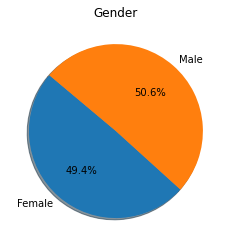

In [18]:
mice_gender = ["Female","Male"]
mice_pc = ["935","958"]
plt.pie(mice_pc,labels=mice_gender, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
final_mouse_drug = pd.DataFrame(combine_mouse_study.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint" : "max_Timepoint"}) 
final_mouse_drug

merged_mouse =pd.merge(combine_mouse_study, final_mouse_drug, on= "Mouse ID")
merged_mouse.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Put treatments into a list for for loop (and later for plot labels)
final_mouse_drug = combine_mouse_study.groupby("Mouse ID").max()["Timepoint"]
final_mouse_test = pd.DataFrame(final_mouse_drug)
merged_mouse_stusy =pd.merge(final_mouse_test,combine_mouse_study, on=("Mouse ID", "Timepoint"))

drug = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
drug_lists_value = []

for drug_lists in drug:
    
    drug_regimen = merged_mouse.loc[merged_mouse["Drug Regimen"] == drug_lists]
    final_df = drug_regimen.loc[drug_regimen["Timepoint"] == drug_regimen["max_Timepoint"]]

    
    values = final_df["Tumor Volume (mm3)"]
    drug_lists_value.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    LowerBound = quartiles[0.25]
    UpperBound = quartiles[0.75]
    IQR = UpperBound - LowerBound
  
    print(f"IQR for {drug_lists}:{IQR}")
    
    Lower_Bound = LowerBound - (1.5*IQR)
    Upper_Bound = UpperBound + (1.5*IQR)
    print(f"Lower Bound {drug_lists}:{Lower_Bound}")
    print(f"Upper Bound {drug_lists}:{Upper_Bound}")
    outliners_count = (values.loc[(final_df["Tumor Volume (mm3)"]>= Upper_Bound) |
                                (final_df["Tumor Volume (mm3)"]<= Lower_Bound)]).count()
    print(f"Number of {drug_lists} outliner:{outliners_count}")
    print(f"---------------------------------------")
 

IQR for Capomulin:7.781863460000004
Lower Bound Capomulin:20.70456164999999
Upper Bound Capomulin:51.83201549
Number of Capomulin outliner:0
---------------------------------------
IQR for Ramicane:9.098536719999998
Lower Bound Ramicane:17.912664470000003
Upper Bound Ramicane:54.30681135
Number of Ramicane outliner:0
---------------------------------------
IQR for Infubinol:11.477135160000003
Lower Bound Infubinol:36.83290494999999
Upper Bound Infubinol:82.74144559000001
Number of Infubinol outliner:1
---------------------------------------
IQR for Ceftamin:15.577752179999997
Lower Bound Ceftamin:25.355449580000002
Upper Bound Ceftamin:87.66645829999999
Number of Ceftamin outliner:0
---------------------------------------


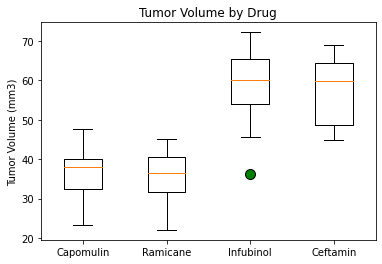

In [21]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='g', markersize=10, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_lists_value, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Tumor Volume by Drug')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

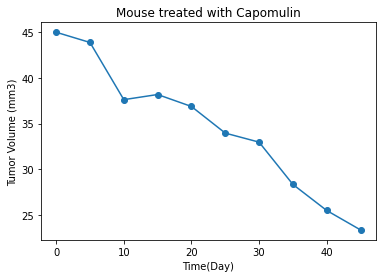

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_volume = combine_mouse_study.loc[combine_mouse_study["Mouse ID"] == 's185']


plt.plot(time_volume["Timepoint"], time_volume["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("Time(Day)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse treated with Capomulin")
plt.show()

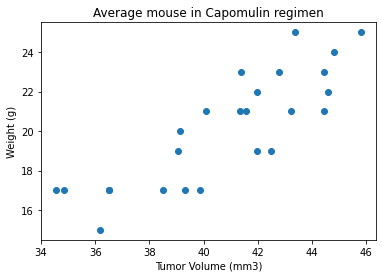

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot

capomulin_df = combine_mouse_study.loc[combine_mouse_study["Drug Regimen"] == "Capomulin"]
volume_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(
    columns={"Tumor Volume (mm3)" : "Tumor_volume"})
volume_df = pd.merge(capomulin_df,volume_df, on="Mouse ID")
summ_volume_df = volume_df[["Weight (g)", "Tumor_volume"]].drop_duplicates()
summ_volume_df

x = summ_volume_df["Tumor_volume"]
y = summ_volume_df["Weight (g)"]

plt.scatter(x,y)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Average mouse in Capomulin regimen")
plt.show()


## Correlation and Regression

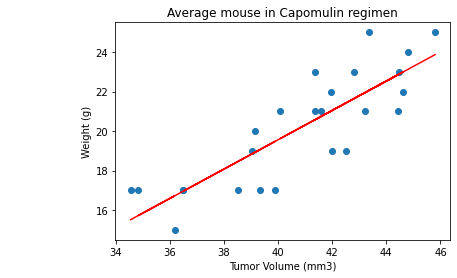

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.
```````````````````````````````````


In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = combine_mouse_study.loc[combine_mouse_study["Drug Regimen"] == "Capomulin"]
volume_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(
    columns={"Tumor Volume (mm3)" : "Tumor_volume"})
volume_df = pd.merge(capomulin_df,volume_df, on="Mouse ID")
summ_volume_df = volume_df[["Weight (g)", "Tumor_volume"]].drop_duplicates()
summ_volume_df

x = summ_volume_df["Tumor_volume"]
y = summ_volume_df["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
#stringe of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print out the r-squared value along with the plot.
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(30,15),fontsize=15,color="red")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Average mouse in Capomulin regimen")
plt.show()

correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")
print(f"```````````````````````````````````")